<a href="https://colab.research.google.com/github/disuja7/Global_terrorism_analysis/blob/main/Deeshu_Kumar_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**Analysis points** - 
1. [Getting data ready.](#s0)
2. [Trend in global terrorism - year-wise and find the possible reasons for the growth of terrorism.](#s1)
3. [Correlation between features of the Data](#s01)
2. [Trend in terrorism by region](#s2)
2. [Top 5 most crime city - (i) correlate city with no. of crimes/attacks.](#s3)
3. [Top 5 terrorist group worlwide - correlate the Group with total casualties
(ii) no. of attacks (iii) Success.](#s4)
4. [The most dangerous weapon - correlate weapon type with total casualties.](#s5)
5. [What is the most probable Target type for terrorist - correlate of Target type with - (i) no. of attacks (ii) total casualties.](#s6)


<a name="s0"></a>
# **(1). Getting Data Ready**

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
#Reading the data file
import pandas as pd
file_path = '/content/drive/MyDrive/DATA/Global Terrorism Data.csv'
df = pd.read_csv(file_path,encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Overveiwing the Data**

In [53]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [54]:
df.shape

(181691, 135)

In [55]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [57]:
# Filtering the data - extracting the required column only
df = df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1_txt','target1','nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt','motive','success']]

In [58]:
# Renaming the column
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','success':'Success'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Overveiw of new filtered data**

In [59]:
df.head()

,Year,Month,Day,Country,Region,city,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive,Success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [60]:
df.shape

(181691, 16)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   AttackType   181691 non-null  object 
 7   Target       181055 non-null  object 
 8   Killed       171378 non-null  float64
 9   Wounded      165380 non-null  float64
 10  Summary      115562 non-null  object 
 11  Group        181691 non-null  object 
 12  Target_type  181691 non-null  object 
 13  Weapon_type  181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Success      181691 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 22.2+ MB


<a name="s1"></a>
# **(2). Observing the trend in Global Terrorism**

In [62]:
# Counting the no. of attacks happened each year
year_wise_attack=df['Year'].value_counts().rename_axis('Year').reset_index(name='No. of attacks')
year_wise_attack.sort_values(by='Year',inplace=True)
year_wise_attack.head(10)

,Year,No. of attacks
42,1970,651
46,1971,471
44,1972,568
45,1973,473
43,1974,581
41,1975,740
40,1976,923
36,1977,1319
33,1978,1526
26,1979,2662


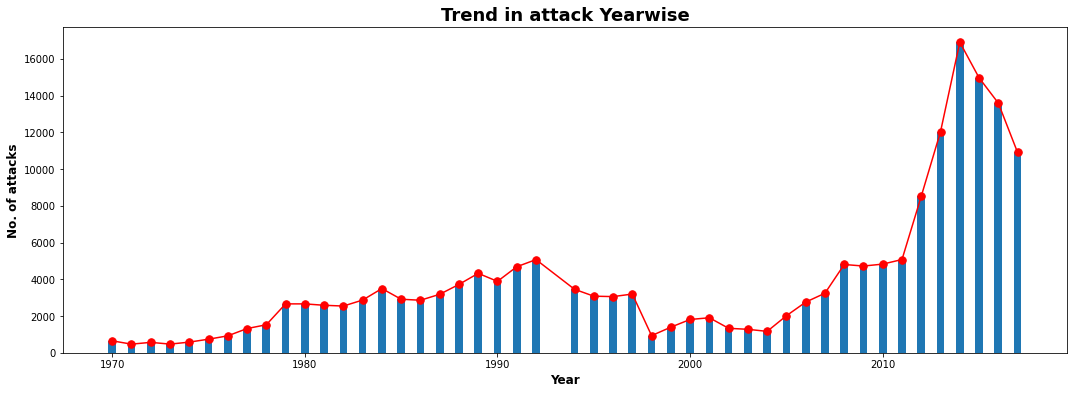

In [63]:
# Visualising the above result using matplotlib line & bar chart
import matplotlib.pyplot as plt
years = list(year_wise_attack['Year'])
attacks = list(year_wise_attack['No. of attacks'])
fig = plt.figure(figsize = (18,6))
# creating the bar plot
plt.bar(years,attacks,
        width = 0.4)
plt.plot(years,attacks,marker='.', color='red', ms=15)
 
plt.xlabel("Year",weight='bold',fontsize=12)
plt.ylabel("No. of attacks",weight='bold',fontsize=12)
plt.title("Trend in attack Yearwise",weight='bold',fontsize=18)
plt.show()

**The above graph shows the trend in global terrorist attacks each year. We can easily obsereve that there is a rapid growth in number of attackes after 2011.There may have been many reasons for this rapid growth, let's try out to find some of them.**

In [64]:
# Looking at the no. of attacks done by terrorist groups before 2012
data_before_2012 = df[df['Year']<2012]
data_before_2012['Group'].value_counts().head(10)

Unknown                                             44455
Shining Path (SL)                                    4519
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2045
Basque Fatherland and Freedom (ETA)                  2024
Taliban                                              1660
Liberation Tigers of Tamil Eelam (LTTE)              1606
Communist Party of India - Maoist (CPI-Maoist)       1421
New People's Army (NPA)                              1335
Name: Group, dtype: int64

In [65]:
# Looking at the no. of attacks done by terrorist groups on and after 2012
data_onwards_2012 = df[df['Year']>=2012]
data_onwards_2012['Group'].value_counts().head(10)

Unknown                                        38327
Taliban                                         5818
Islamic State of Iraq and the Levant (ISIL)     5613
Al-Shabaab                                      2963
Boko Haram                                      2266
New People's Army (NPA)                         1437
Maoists                                         1330
Kurdistan Workers' Party (PKK)                  1081
Houthi extremists (Ansar Allah)                 1048
Al-Qaida in the Arabian Peninsula (AQAP)         889
Name: Group, dtype: int64

**The above data analysis shows that there are some new Terrorist Groups that comes into existence after 2012 or some existing Groups started more number of attacks due to which there is a rapid growth in global terrorists attack after 2012. Some of these Groups are -**

**Taliban                                         
Islamic State of Iraq and the Levant (ISIL)     
Al-Shabaab                                      
Boko Haram                                      
New People's Army (NPA)                         
Maoists                                         
Kurdistan Workers' Party (PKK)                  
Houthi extremists (Ansar Allah)                 
Al-Qaida in the Arabian Peninsula (AQAP)**

**Let's Visualize the growth in attacks for each of the above mentioned terrorist groups.**

In [66]:
#creating a dataset for the above mentioned terrorist groups
terror_group=df[(df['Group']=='Taliban')|(df['Group']=='Islamic State of Iraq and the Levant (ISIL)')|(df['Group']=='Al-Shabaab')|(df['Group']=='Boko Haram')|(df['Group']=="New People's Army (NPA)")|(df['Group']=='Maoists')|(df['Group']=="Kurdistan Workers' Party (PKK)")|(df['Group']=='Houthi extremists (Ansar Allah)')|(df['Group']=='Al-Qaida in the Arabian Peninsula (AQAP)')].Group
print(terror_group)

39                            New People's Army (NPA)
169                           New People's Army (NPA)
739                           New People's Army (NPA)
3611                          New People's Army (NPA)
3614                          New People's Army (NPA)
                             ...                     
181676                                        Taliban
181679    Islamic State of Iraq and the Levant (ISIL)
181680                                     Al-Shabaab
181683                                        Taliban
181686                                     Al-Shabaab
Name: Group, Length: 27591, dtype: object


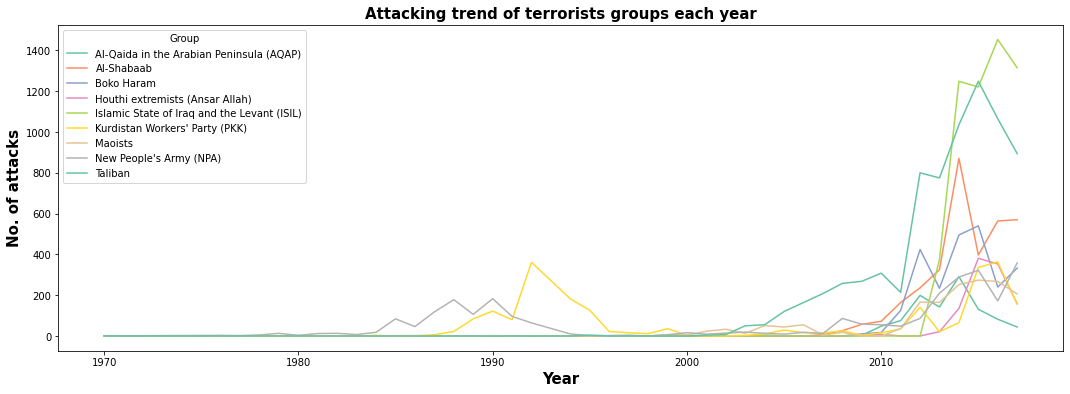

In [67]:
# importing seaborn library
import seaborn as sns
# plotting the data
terror_country=pd.crosstab(df.Year,terror_group)
terror_country.plot(color=sns.color_palette('Set2',9))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.ylabel('No. of attacks',weight = 'bold',fontsize=15)
plt.xlabel('Year',weight = 'bold',fontsize=15)
plt.title('Attacking trend of terrorists groups each year',weight = 'bold',fontsize=15)
plt.show()

In [68]:
# Attacks in the city before 2012
data_before_2012[['city','Country']].value_counts().head(10)

city          Country       
Baghdad       Iraq              3384
Lima          Peru              2356
Belfast       United Kingdom    1976
Santiago      Chile             1592
San Salvador  El Salvador       1558
Karachi       Pakistan          1525
Bogota        Colombia           952
Istanbul      Turkey             939
Beirut        Lebanon            896
Athens        Greece             866
dtype: int64

In [69]:
# Attacks in the city on and after 2012
data_onwards_2012[['city','Country']].value_counts().head(10)

city       Country    
Baghdad    Iraq           4201
Mosul      Iraq           1514
Karachi    Pakistan       1126
Mogadishu  Somalia        1081
Unknown    Afghanistan     872
Benghazi   Libya           837
Quetta     Pakistan        527
Arish      Egypt           521
Peshawar   Pakistan        479
Unknown    Yemen           461
dtype: int64

In [70]:
data_before_2012['Country'].value_counts().head(10)

Iraq              7837
Colombia          7449
India             6920
Peru              6047
Pakistan          5522
El Salvador       5320
United Kingdom    4599
Philippines       3366
Spain             3231
Afghanistan       3036
Name: Country, dtype: int64

In [71]:
data_onwards_2012['Country'].value_counts().head(10)

Iraq           16799
Afghanistan     9695
Pakistan        8846
India           5040
Philippines     3542
Nigeria         3331
Somalia         3173
Yemen           2915
Libya           2231
Syria           2003
Name: Country, dtype: int64


**Other reason for the rapid growth in global terrorism after 2012 is the increase in Attacks/Crimes in countries like- Iraq , Afghanistan and Pakistan.
While in Iraq- Baghdad and Mosul has most number of attacks.**

**Let's visualize the growth in attacks each year for the countries with maximum attacks.**


In [72]:
#creating a dataset for the most attacked countries on and after 2012
attacked_countries=df[(df['Country']=='Iraq')|(df['Country']=='Afghanistan')|(df['Country']=='Pakistan')|(df['Country']=='India')|(df['Country']=='Philippines')|(df['Country']=='Nigeria')|(df['Country']=='Somalia')|(df['Country']=='Yemen')|(df['Country']=='Libya')|(df['Country']=='Syria')].Country
print(attacked_countries)

2         Philippines
26        Philippines
39        Philippines
96        Philippines
150       Philippines
             ...     
181686        Somalia
181687          Syria
181688    Philippines
181689          India
181690    Philippines
Name: Country, Length: 86449, dtype: object


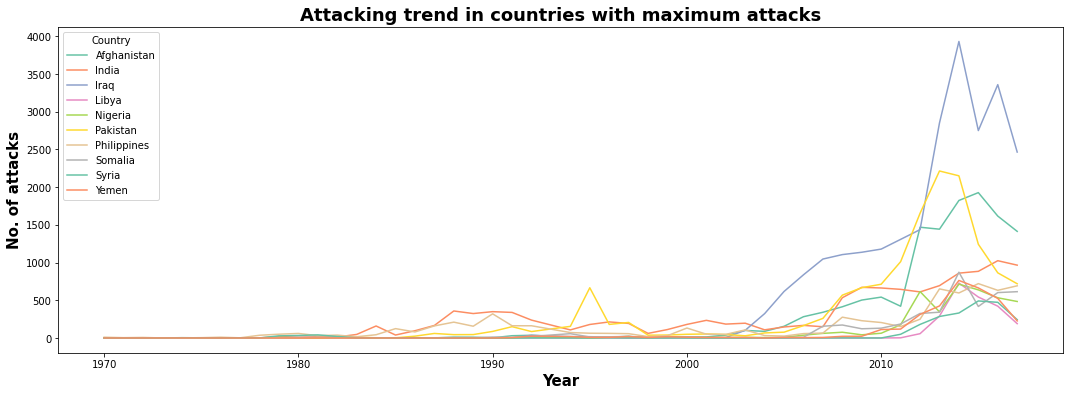

In [73]:
# Visualizing the growth in attacks for the above mentioned countries
import seaborn as sns
terror_country=pd.crosstab(df.Year,attacked_countries)
terror_country.plot(color=sns.color_palette('Set2',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.ylabel('No. of attacks',weight = 'bold',fontsize=15)
plt.xlabel('Year',weight = 'bold',fontsize=15)
plt.title('Attacking trend in countries with maximum attacks',weight = 'bold',fontsize=18)
plt.show()



---



<a name="s01"></a>
# **(3). Correlation between features of Data**

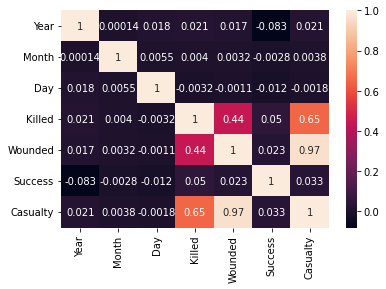

In [96]:
import seaborn as sns
ax = sns.heatmap(df.corr(), annot=True)

**The above correlation matrix shows that almost all features are independent of each other except the 'Casualty' feature showing strong correlation with 'Killed' and 'Wounded' feature and it is quite natural as we have derived the 'Casualty' feature from the both columns itself. Also a medium correlation between 'Killed' and 'Wounded' feature can be ignored as we will be working with only 'Casualty' feature which has the feature of both the columns.**



---



<a name="s2"></a>
# **(4). Trend in terrorism by region**

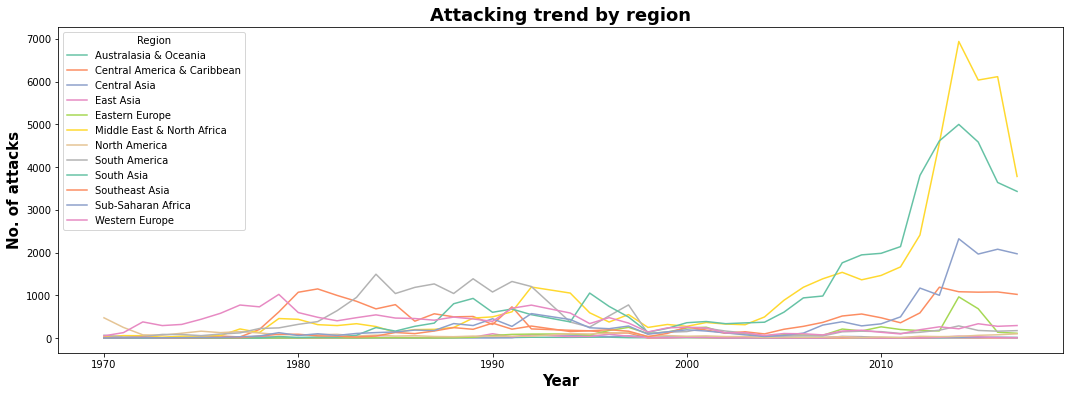

In [74]:
# Visualizing the growth in attacks for the above mentioned countries
import seaborn as sns
terror_region=pd.crosstab(df.Year,df.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.ylabel('No. of attacks',weight = 'bold',fontsize=15)
plt.xlabel('Year',weight = 'bold',fontsize=15)
plt.title('Attacking trend by region',weight = 'bold',fontsize=18)
plt.show()

**From above graph it can be easily observed that in the region of Middle East & North Africa and South Asia there is rapid growth in attacks on and after 2012.** 

## **Let's find out the motive of attacks in these two regions on and after 2012**

In [75]:
motive_africa=data_onwards_2012[data_onwards_2012['Region']=='Middle East & North Africa'].Motive.value_counts().rename_axis('Motive').reset_index(name='Count')
motive_africa.sort_values(by='Count',ascending=False,inplace=True)
motive_africa.head(10)

,Motive,Count
0,"The specific motive is unknown; however, sourc...",52
1,"The specific motive is unknown; however, Al-Qa...",43
2,"The specific motive is unknown; however, sourc...",42
3,"The specific motive is unknown; however, sourc...",38
4,Al-Qa ida in Iraq claimed responsibility for t...,35
5,"Abu Mohammed al-Adnani, a spokesperson for Al-...",32
6,Al-Qa ida in Iraq claimed responsibility and s...,28
7,Al-Qa'ida in Iraq claimed responsibility in an...,27
8,"Abu Bakr al-Baghdadi, the leader of Al-Qa ida ...",27
10,"In a statement posted online, Islamic State of...",23


In [76]:
motive_africa=data_onwards_2012[data_onwards_2012['Region']=='South Asia'].Motive.value_counts().rename_axis('Motive').reset_index(name='Count')
motive_africa.sort_values(by='Count',ascending=False,inplace=True)
motive_africa.head(10)

,Motive,Count
0,"The specific motive is unknown; however, sourc...",297
1,"The specific motive is unknown; however, sourc...",50
2,"The specific motive is unknown; however, polic...",32
3,"The specific motive is unknown; however, sourc...",31
4,"The specific motive is unknown; however, sourc...",27
5,"The specific motive is unknown; however, sourc...",25
6,The Taliban claimed responsibility for the inc...,23
7,The Haqqani Network clamed responsibility for ...,22
8,"The specific motive is unknown; however, sourc...",15
9,"The specific motive is unknown; however, sourc...",15


**The above two tables describe the common motive behind the attack on and after 2012 for the two regions above mentioned.**



---



<a name="s3"></a>
# **(5). Top 5 crime cities**

In [77]:
# counting the no, of attacks for each city
city_wise_attack=df['city'].value_counts().rename_axis('City').reset_index(name='No. of attacks')
# dropping the unknown city column
city_wise_attack.drop(index=0,inplace=True)
city_wise_attack=city_wise_attack.head(5)
city_wise_attack

,City,No. of attacks
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171


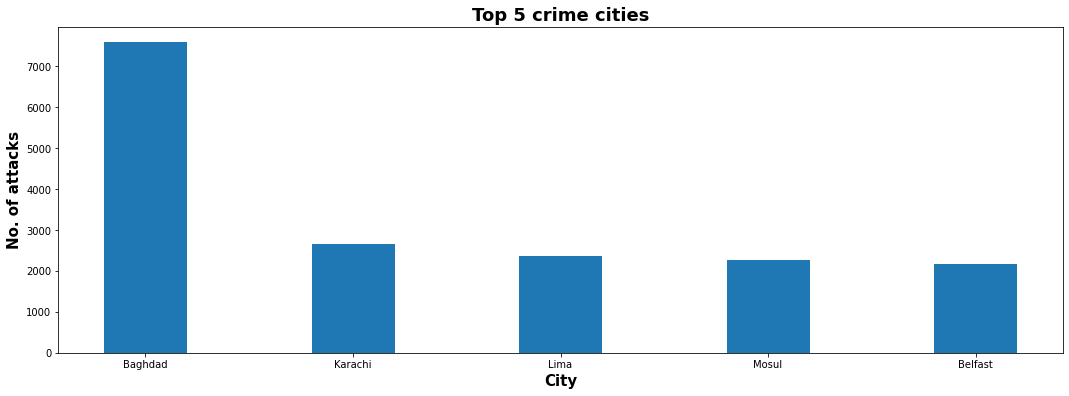

In [78]:
# Visualizing the Top 5 crime cities using matplolib bar chart

# importing libraries
import matplotlib.pyplot as plt

#declairing data
city = list(city_wise_attack['City'])
attacks = list(city_wise_attack['No. of attacks'])
fig = plt.figure(figsize = (18, 6))
 
# creating the bar plot
plt.bar(city,attacks,
        width = 0.4)
 
plt.xlabel("City",weight='bold',fontsize=15)
plt.ylabel("No. of attacks",weight='bold',fontsize=15)
plt.title("Top 5 crime cities",weight='bold',fontsize=18)
plt.show()

**The above graph shows the top 5 crime cities where most number of attacks has been recorded.**



---



<a name="s4"></a>
# **(6). Top 5 terrorist groups who have created most harm in the city.**

In [79]:
#checking for null values under 'Killed' column
df['Killed'].isna().sum()

10313

In [80]:
#checking for null values under 'Wounded' column
df['Wounded'].isna().sum()

16311

In [81]:
# replacing null values with zero
df['Killed']=df['Killed'].fillna(0)
df['Wounded']=df['Wounded'].fillna(0)

In [82]:
# adding a new column 'Casualty' which includes both killed and wounded people
df['Casualty'] = df['Killed']+df['Wounded']
df.head(5)

,Year,Month,Day,Country,Region,city,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive,Success,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,0.0,0.0,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,0.0,0.0,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1,0.0


In [83]:
# counting the total no. of attacks done by each terrorist group (successful and unsuccessful included)
terrorist_group1 = df['Group'].value_counts().rename_axis('Group').reset_index(name='No. of attacks')
terrorist_group1.head(10)

,Group,No. of attacks
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


In [84]:
# counting the number of successful attacks done by each terrorist group
success_data =  df.groupby(by='Group')['Success'].sum().rename_axis('Group').reset_index(name='Success')
success_data.sort_values(by= 'Success', ascending = False)

,Group,Success
3408,Unknown,71748
3138,Taliban,6680
1535,Islamic State of Iraq and the Levant (ISIL),4759
2948,Shining Path (SL),4337
1120,Farabundo Marti National Liberation Front (FMLN),3317
...,...,...
976,Dainihon Yokuko Doshikai,0
977,Danish Neo-Nazi Group,0
978,Dark Harvest,0
400,Arab Liberation Army,0


In [85]:
# Total casualties done by each terrorist group
terrorist_group2 =  df.groupby(by='Group')['Casualty'].sum().rename_axis('Group').reset_index(name='Casualty')
terrorist_group2.sort_values(by='Casualty', ascending =False, inplace=True)
terrorist_group2.head(10)

,Group,Casualty
3408,Unknown,322706.0
1535,Islamic State of Iraq and the Levant (ISIL),69595.0
3138,Taliban,57342.0
704,Boko Haram,29801.0
161,Al-Qaida,28372.0
1864,Liberation Tigers of Tamil Eelam (LTTE),22020.0
177,Al-Shabaab,16954.0
3165,Tehrik-i-Taliban Pakistan (TTP),15574.0
165,Al-Qaida in Iraq,14724.0
2948,Shining Path (SL),14632.0


In [86]:
# Merging the above created datas on Group column
Top_terrorist=terrorist_group1.merge(terrorist_group2,on='Group').merge(success_data,on='Group')
# Adding a new column 'Success_rate' for each terrorists group
Top_terrorist['Success_rate'] = (Top_terrorist['Success']/Top_terrorist['No. of attacks'])*100
Top_terrorist.drop(index=0,inplace=True)
# Sorting the data based on Casualty
Top_terrorist.sort_values(by = 'Casualty',ascending = False, inplace = True)
Top_terrorist=Top_terrorist.head(5)
Top_terrorist

,Group,No. of attacks,Casualty,Success,Success_rate
2,Islamic State of Iraq and the Levant (ISIL),5613,69595.0,4759,84.785320
1,Taliban,7478,57342.0,6680,89.328698
9,Boko Haram,2418,29801.0,2247,92.928040
157,Al-Qaida,74,28372.0,64,86.486486
14,Liberation Tigers of Tamil Eelam (LTTE),1606,22020.0,1530,95.267746


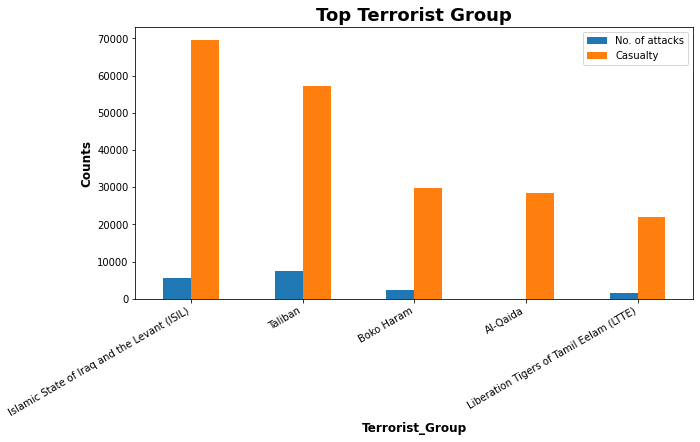

In [87]:
# Visualizing the above result on matplotlib bar chart

# importing libraries
import matplotlib.pyplot as plt
  
# # declaring data
# data = list(Top_terrorist['Casualty'])
# keys = list(Top_terrorist['Group'])
# fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
# plt.bar(keys,data,
#         width = 0.4)
Top_terrorist.plot(x="Group", y=["No. of attacks", "Casualty"], kind="bar",figsize=(10,5))
plt.xticks(rotation=30,ha='right') 
plt.xlabel("Terrorist_Group",fontsize=12,weight = 'bold')
plt.ylabel("Counts",fontsize=12,weight = 'bold')
plt.title("Top Terrorist Group",fontsize=18,weight = 'bold')
plt.show()

**The above chart shows the top 5 terrorist groups worldwide based on no. of attacks and casualties. 

## **Let's find out the main motive of the groups-ISIL and Taliban behind their attacks.**

In [88]:
motive_ISIL=df[df['Group']=='Islamic State of Iraq and the Levant (ISIL)'].Motive.value_counts().rename_axis('Motive').reset_index(name='Count')
motive_ISIL.sort_values(by='Count',ascending=False,inplace=True)
motive_ISIL.head()

,Motive,Count
0,"The specific motive is unknown; however, sourc...",25
1,"In a statement posted online, Islamic State of...",23
2,"According to an online statement, Islamic Stat...",23
3,"The specific motive is unknown; however, sourc...",20
4,"The specific motive is unknown; however, sourc...",18


In [89]:
motive_ISIL=df[df['Group']=='Taliban'].Motive.value_counts().rename_axis('Motive').reset_index(name='Count')
motive_ISIL.sort_values(by='Count',ascending=False,inplace=True)
motive_ISIL.head()

,Motive,Count
0,The specific motive for the attack is unknown.,723
1,Unknown,605
2,The Taliban claimed responsibility for the inc...,23
3,The specific motive for the attack is unknown..,10
4,The specific motive for the attack is unknown;...,8


**From the above two table it seems that we can understand some of the motives of ISIL behind their attacks but for Taliban it's difficult to understand their motive since most of them are unknown. So we need more infromation about Taliban to understand their motive.**



---



<a name="s5"></a>
# **(7). Most dangerous weapons of terrorists**

In [90]:
# Grouping the data by Weapon_type based on aggregate: sum of casualties with each weapon_type
weapons_data =  df.groupby(by='Weapon_type')['Casualty'].sum().rename_axis('Weapon_type').reset_index(name='Casualty')
weapons_data.sort_values(by= 'Casualty',ascending = False,inplace = True)
#dropping the row with unknown weapon_type
weapons_data.drop(index=10,inplace=True)
weapons_data = weapons_data.head(5)
weapons_data

,Weapon_type,Casualty
2,Explosives,560181.0
4,Firearms,252113.0
11,Vehicle (not to include vehicle-borne explosiv...,20305.0
6,Melee,16070.0
1,Chemical,14449.0


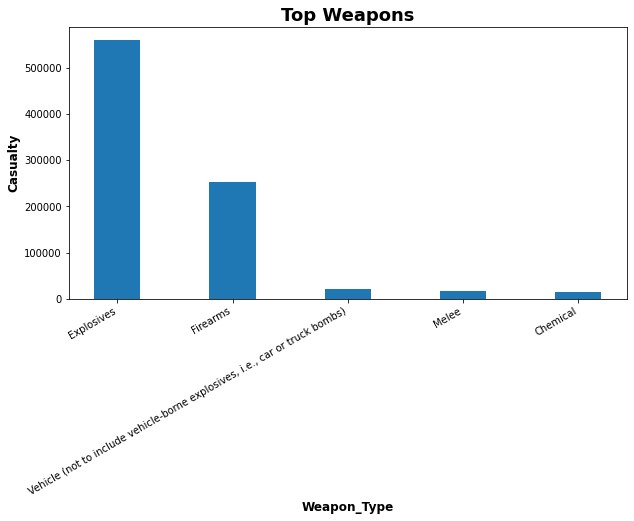

In [91]:
weapons = list(weapons_data['Weapon_type'])
Casualty = list(weapons_data['Casualty'])
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(weapons,Casualty,
        width = 0.4)
plt.xticks(rotation=30,ha='right')
plt.xlabel("Weapon_Type",fontsize=12,weight = 'bold')
plt.ylabel("Casualty",fontsize=12,weight = 'bold')
plt.title("Top Weapons",fontsize=18,weight = 'bold')
plt.show()

**The above analysis shows that Explosive and Firearms are the most dangerous weapons ever for terrorists since maximum no. of casualties are due to these weapons.**



---



<a name="s6"></a>
# **(8). Most probable Target for terrorists**

In [92]:
# counting no. of attacks for each target type
Target_type = df['Target'].value_counts().rename_axis('Target').reset_index(name='No. of attacks')
Target_type.head(10)

,Target,No. of attacks
0,Civilians,6461
1,Unknown,5918
2,Soldiers,3157
3,Patrol,2942
4,Checkpoint,2905
5,Vehicle,2785
6,Officers,1787
7,Village,1679
8,Military Unit,1533
9,Bus,1335


In [93]:
# Total no. of casualties for each target type
Target_type_data =  df.groupby(by='Target')['Casualty'].sum().rename_axis('Target').reset_index(name='Casualty')
Target_type_data.sort_values(by= 'Casualty',ascending = False,inplace = True)
Target_type_data.head(10)

,Target,Casualty
19410,Civilians,53127.0
63974,Soldiers,22203.0
17472,Checkpoint,20064.0
44013,Market,16739.0
76741,Unknown,16442.0
78314,Village,15761.0
46330,Military Unit,12920.0
52505,Patrol,11636.0
50376,Officers,9605.0
52332,Passengers and crew members on American Airlin...,9574.0


In [94]:
# Merging the both data on Column 'Target,
Top_target_type=Target_type.merge(Target_type_data,on='Target')
# Dropping the Unknown Target column
Top_target_type.drop(index=1,inplace=True)
Top_target_type = Top_target_type.head(10)
Top_target_type

,Target,No. of attacks,Casualty
0,Civilians,6461,53127.0
2,Soldiers,3157,22203.0
3,Patrol,2942,11636.0
4,Checkpoint,2905,20064.0
5,Vehicle,2785,9526.0
6,Officers,1787,9605.0
7,Village,1679,15761.0
8,Military Unit,1533,12920.0
9,Bus,1335,8218.0
10,Convoy,1262,8399.0


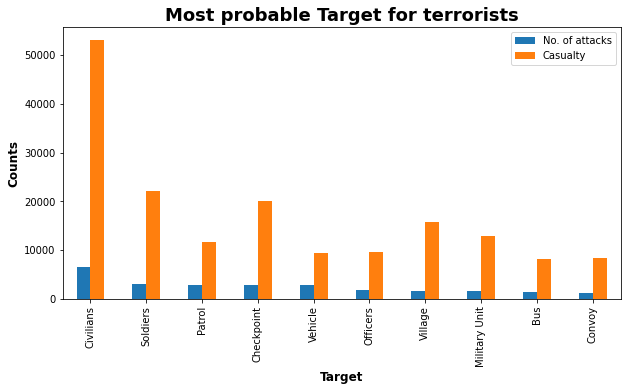

In [95]:
Top_target_type.plot(x="Target", y=["No. of attacks", "Casualty"], kind="bar",figsize=(10,5))
plt.xlabel("Target",fontsize=12,weight = 'bold')
plt.ylabel("Counts",fontsize=12,weight = 'bold')
plt.title("Most probable Target for terrorists",fontsize=18,weight = 'bold')
plt.show()

**From the above chart we conclude that Civilians and Soldiers are the main target of tyerrorists, so when there is any chances of attack, first step should be to escape all the civilians and inform soldiers to be prepaired.**



---

